# Build and deploy ML model

## 1. Build ML

In [80]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [81]:
# 1. EDA : Exploratory Data Analysis

mpg = sns.load_dataset(name='mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [82]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [83]:
mpg.isnull().sum()/len(mpg)

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [84]:
mpg.dropna( subset="horsepower",
    inplace=True)
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

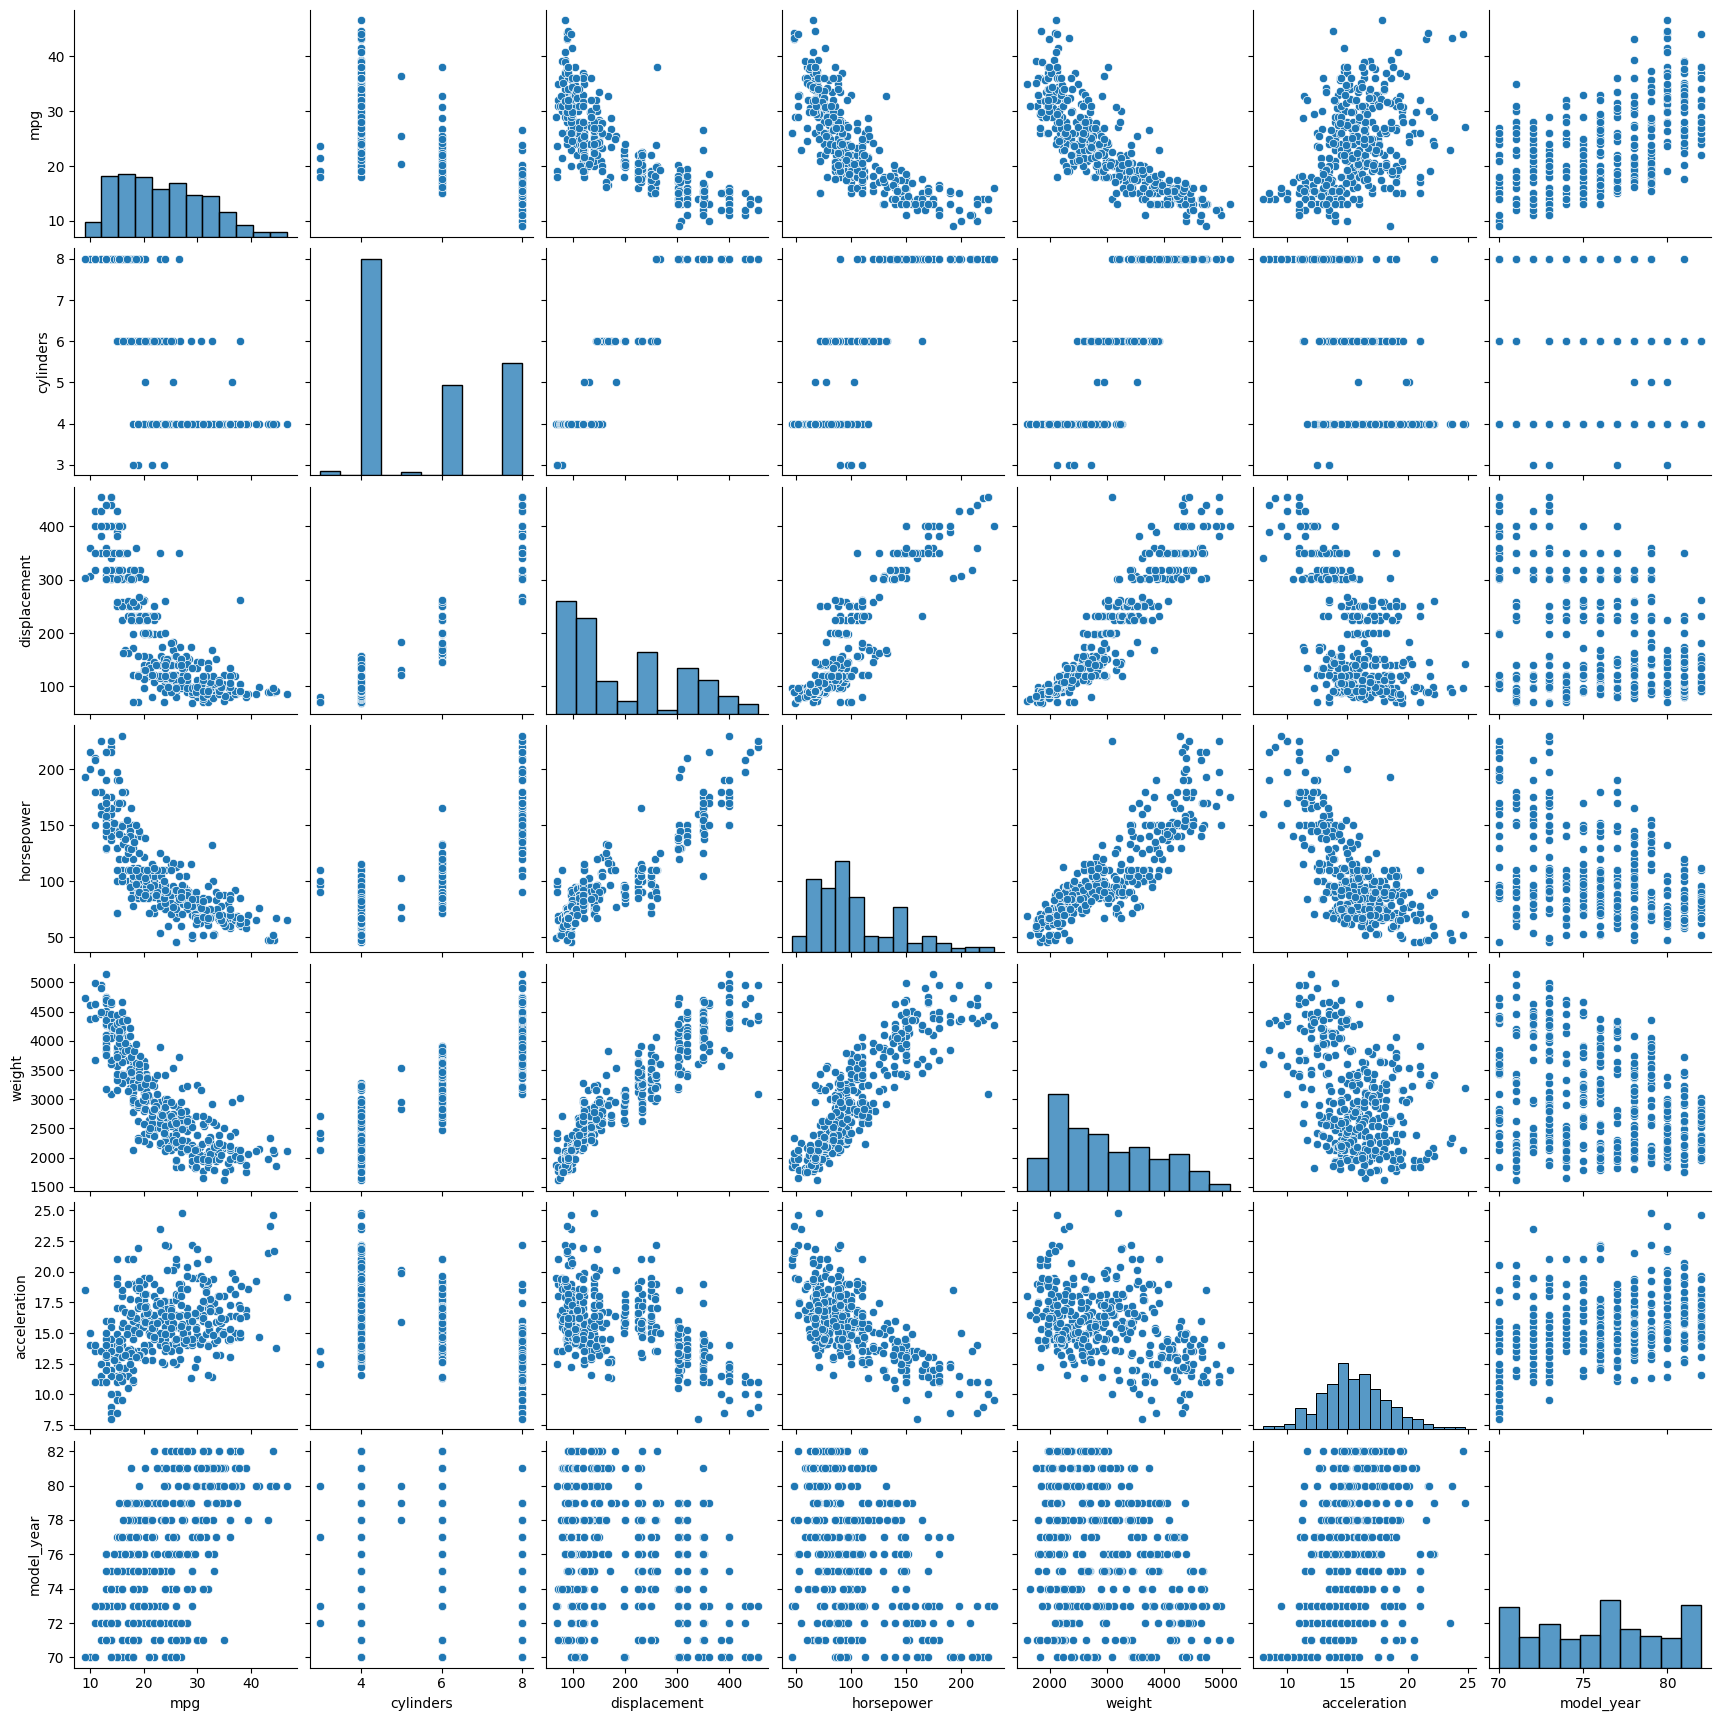

In [85]:
sns.pairplot(data=mpg)

<Axes: xlabel='weight', ylabel='mpg'>

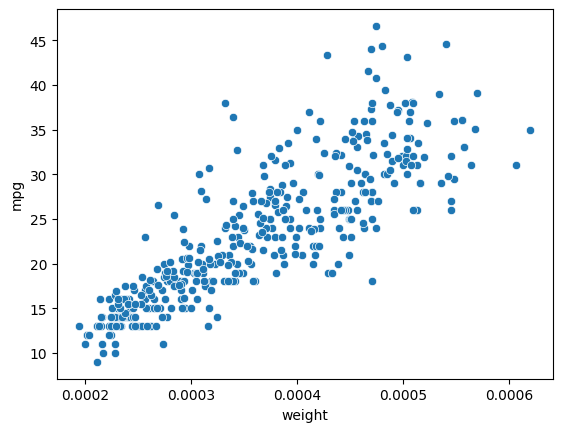

In [86]:
sns.scatterplot(x=1/mpg["weight"], y=mpg["mpg"])

In [87]:
mpg["inv_mpg"] = 1/mpg["mpg"]
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,inv_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.055556
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.066667
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.055556
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.062500
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.058824


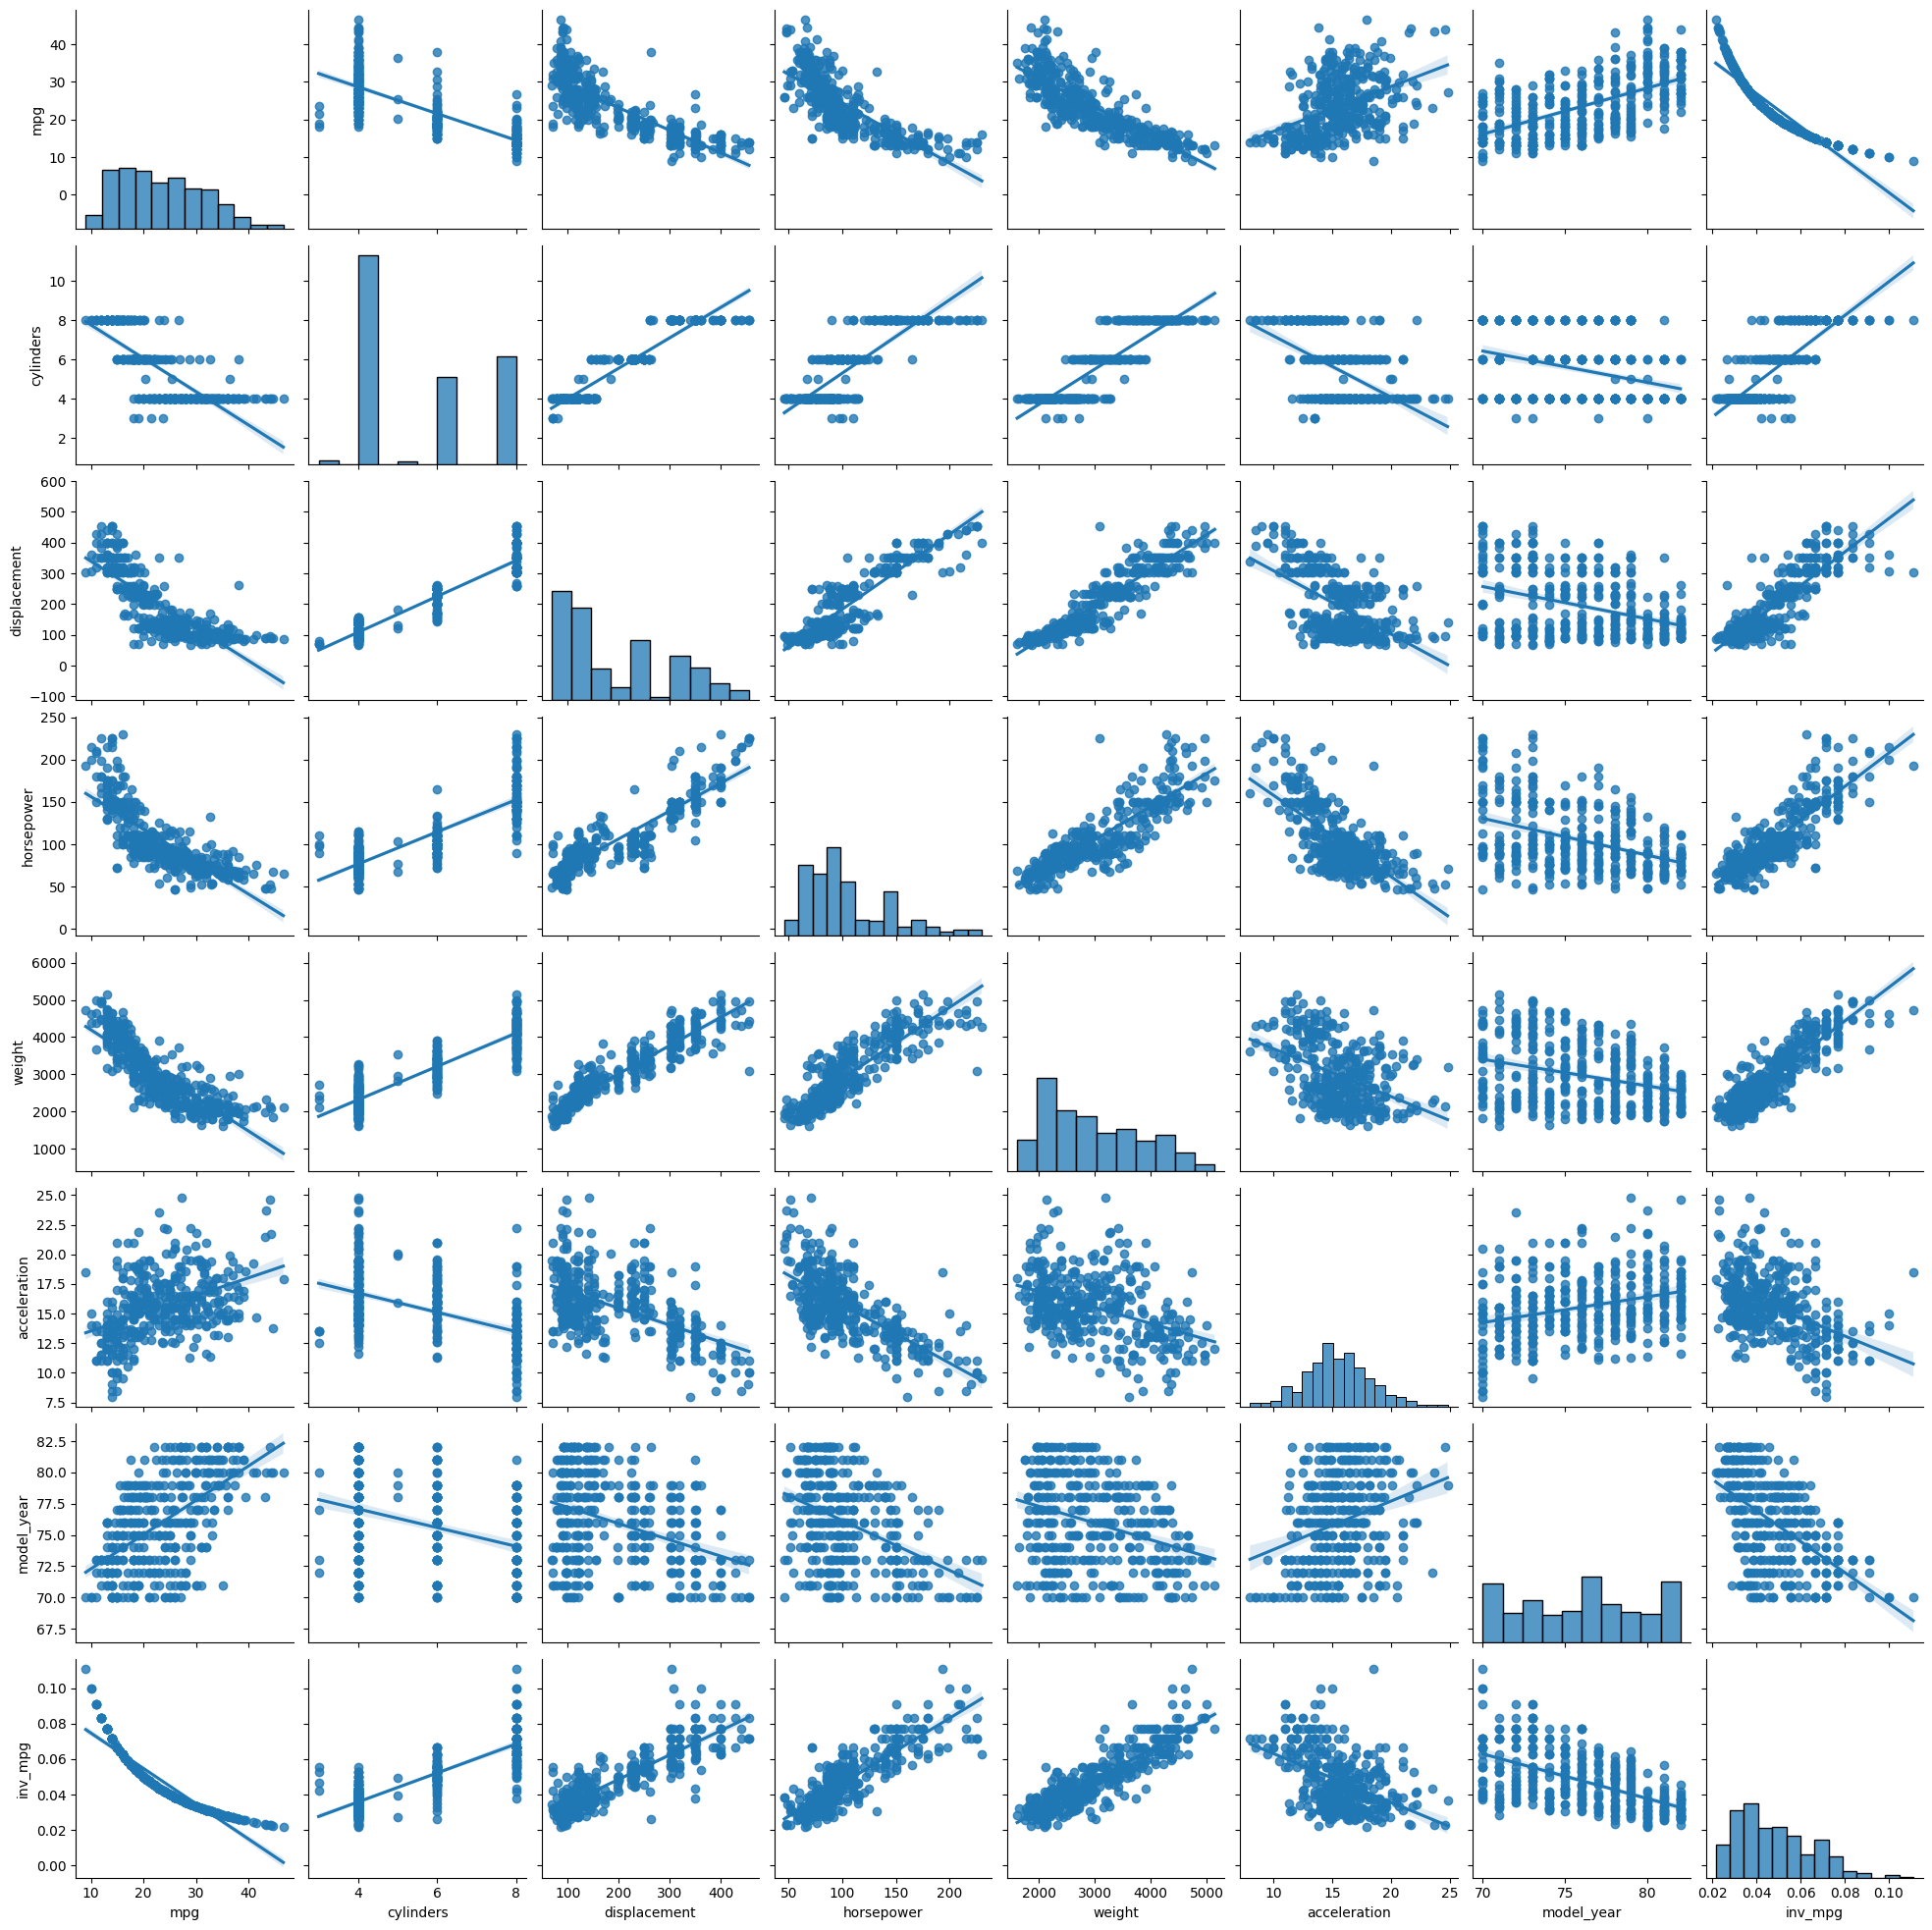

In [88]:
sns.pairplot(
    data=mpg.select_dtypes(include='number'),
    kind='reg'
)

In [89]:
mpg.origin.value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [90]:
mpg.model_year.value_counts(sort=False)

model_year
70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: count, dtype: int64

In [91]:
mpg["age"] = mpg["model_year"].max() - mpg["model_year"]
mpg.sample(n=10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,inv_mpg,age
229,16.0,8,400.0,180.0,4220,11.1,77,usa,pontiac grand prix lj,0.062500,5
146,28.0,4,90.0,75.0,2125,14.5,74,usa,dodge colt,0.035714,8
340,25.8,4,156.0,92.0,2620,14.4,81,usa,dodge aries wagon (sw),0.038760,1
343,39.1,4,79.0,58.0,1755,16.9,81,japan,toyota starlet,0.025575,1
137,13.0,8,350.0,150.0,4699,14.5,74,usa,buick century luxus (sw),0.076923,8
370,31.0,4,112.0,85.0,2575,16.2,82,usa,pontiac j2000 se hatchback,0.032258,0
194,22.5,6,232.0,90.0,3085,17.6,76,usa,amc hornet,0.044444,6
164,21.0,6,231.0,110.0,3039,15.0,75,usa,buick skyhawk,0.047619,7
56,26.0,4,91.0,70.0,1955,20.5,71,usa,plymouth cricket,0.038462,11
324,40.8,4,85.0,65.0,2110,19.2,80,japan,datsun 210,0.024510,2


<Axes: xlabel='model_year', ylabel='inv_mpg'>

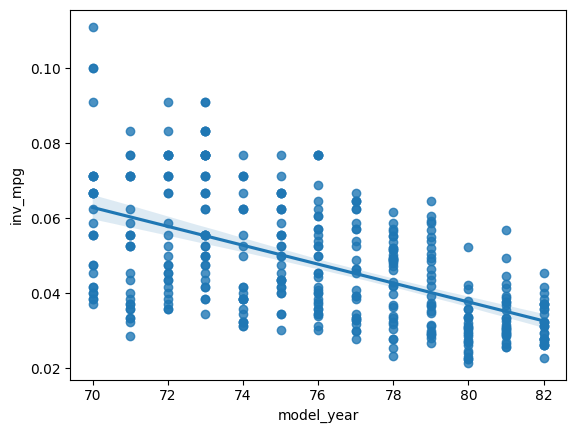

In [92]:
sns.regplot(data=mpg, y="inv_mpg", x="model_year")

In [93]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'inv_mpg', 'age'],
      dtype='object')

In [94]:
features = [   
               'cylinders', 
               'displacement', 
               'horsepower',
               'weight',
               'acceleration', 
               'model_year', 
           ]    

target = ['inv_mpg']



In [109]:
df.columns.tolist()

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'inv_mpg']

In [107]:
df = mpg[features + target ].copy()
df.sample(n=10)

,cylinders,displacement,horsepower,weight,acceleration,model_year,inv_mpg
16,6,199.0,97.0,2774,15.5,70,0.055556
80,4,122.0,86.0,2395,16.0,72,0.045455
5,8,429.0,198.0,4341,10.0,70,0.066667
68,8,350.0,155.0,4502,13.5,72,0.076923
107,6,232.0,100.0,2789,15.0,73,0.055556
76,4,121.0,112.0,2933,14.5,72,0.055556
293,4,89.0,71.0,1925,14.0,79,0.031348
277,6,163.0,133.0,3410,15.8,78,0.061728
393,4,140.0,86.0,2790,15.6,82,0.037037
286,8,302.0,129.0,3725,13.4,79,0.056818


In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le= LabelEncoder()
ss= StandardScaler()

In [97]:
df[
    [
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "model_year",
    ]
] = ss.fit_transform(
    mpg[
        [
            "cylinders",
            "displacement",
            "horsepower",
            "weight",
            "acceleration",
            "model_year",
        ]
    ]
)

df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,inv_mpg
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,0.055556
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,0.066667
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,0.055556
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,0.062500
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,0.058824


In [98]:
df["origin"] = le.fit_transform(mpg["origin"])
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,inv_mpg,origin
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,0.055556,2
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,0.066667,2
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,0.055556,2
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,0.062500,2
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,0.058824,2


In [99]:
X = df.drop('inv_mpg', axis=1).values
y = df['inv_mpg'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X= X_train, y=y_train)

print(f"Learning score {lr.score(X= X_train, y=y_train)}")

print(f"testing score {lr.score(X= X_test, y=y_test)}")

# prediction = lr.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_true=y_test, y_pred=prediction))

Learning score 0.8846044492611473
testing score 0.890779251538999


In [100]:
# save model as .pkl file

import pickle
with open(file='lr.pkl', mode='wb') as lr_file:
    pickle.dump(obj=lr, file=lr_file)

In [101]:
# Load model

with open(file="lr.pkl", mode='rb') as lr_file:
    lr_loaded = pickle.load(file=lr_file)
    print(lr_loaded)   

LinearRegression()


In [102]:
lr_loaded.score(X=X_test, y=y_test)

0.890779251538999

## 2. Application

In [103]:
import streamlit as st
import pandas as pd

df = pd.DataFrame(data=[1,2,3], 
                  dtype='float32',
                  )

st.write(df)



2024-12-27 16:03:19.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 16:03:19.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [104]:
# Save Label Encoder

## save model as .pkl file

import pickle
with open(file='le.pkl', mode='wb') as le_file:
    pickle.dump(obj=le, file=le_file)

## Load model

with open(file="le.pkl", mode='rb') as le_file:
    le_loaded = pickle.load(file=le_file)
    print(lr_loaded)       



# Save standard scaler
## save model as .pkl file

import pickle
with open(file='ss.pkl', mode='wb') as s_file:
    pickle.dump(obj=ss, file=s_file)

## Load model

with open(file="ss.pkl", mode='rb') as ss_file:
    ss_loaded = pickle.load(file=ss_file)
    print(ss_loaded)      

LinearRegression()
StandardScaler()
